# Importing Header, SoilPrep, and PlotFunctions

In [1]:
import import_ipynb 
from Header import *

import import_ipynb
from SoilPrep import *

importing Jupyter notebook from Header.ipynb
importing Jupyter notebook from SoilPrep.ipynb


In [2]:
import import_ipynb
from PlotFunctions import *

importing Jupyter notebook from PlotFunctions.ipynb
importing Jupyter notebook from LoadDataMetaData.ipynb


In [3]:
import import_ipynb
from HyperMain import * 

importing Jupyter notebook from HyperMain.ipynb
For:Sand-> ['L1r2', 0.19, 'Spec:', 'log', 'bands: 11'] :mult
For:Sand-> ['L1r2', 0.33, 'Spec:', 'log', 'bands: 11'] :plsr
For:Sand-> ['L1r2', 0.33, 'Spec:', 'log', 'bands: 11'] :svr
For:Sand-> ['L1r2', 0.35, 'Spec:', 'log', 'bands: 11'] :ridge
For:Sand-> ['L1r2', 0.31, 'Spec:', 'fod', 'bands: 11'] :cubist
For:Sand-> ['L1r2', 0.35, 'Spec:', 'fod', 'bands: 11'] :gbrt
For:Silt-> ['L1r2', 0.17, 'Spec:', 'fod_log', 'bands: 11'] :mult
For:Silt-> ['L1r2', 0.19, 'Spec:', 'fod_log', 'bands: 11'] :plsr
For:Silt-> ['L1r2', 0.22, 'Spec:', 'log', 'bands: 11'] :svr
For:Silt-> ['L1r2', 0.1, 'Spec:', 'log', 'bands: 11'] :ridge
For:Silt-> ['L1r2', 0.2, 'Spec:', 'log', 'bands: 11'] :cubist
For:Silt-> ['L1r2', 0.34, 'Spec:', 'fod', 'bands: 11'] :gbrt
For:Clay-> ['L1r2', 0.12, 'Spec:', 'log', 'bands: 11'] :mult
For:Clay-> ['L1r2', 0.49, 'Spec:', 'log', 'bands: 11'] :plsr
For:Clay-> ['L1r2', 0.42, 'Spec:', 'log', 'bands: 11'] :svr
For:Clay-> ['L1r2', 0.33, 'S

interactive(children=(Dropdown(description='method', options=('mult', 'plsr', 'svr', 'ridge', 'cubist', 'gbrt'…

## Loading  Mtree 

In [4]:
with open ('HMtree.pickle', 'rb') as file:
    HMtree = pickle.load(file)
 

In [5]:
# with open ('Feature.pickle', 'rb') as file:
#     feature_scores = pickle.load(file)
 

In [6]:
# with open ('Models.pickle', 'rb') as file:
#     model_details = pickle.load(file)
 

 #  Best Models for Sand, Silt, Clay, and CaCO3.

In [8]:
feature_scores = {}

model_details ={}

In [79]:
#HMtree['plsr']['CaCO3']['none']['fod_log']

##  Sand 

### GBRT

Sand -> [ r2 - **0.35**, Spec - fod, n_bands -11]     <br/><br/>
***Description***: To obtain the best model for sand using gradient boosting regression tree method we trained the model on the first order derivative of the  smoothed spectra which was  resampled to the 11 bands provided by Venus.

In [12]:
sand_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 30, random_state = 42) 
sand_model_gbrt.fit(fod_sampled11,  T[0])

GradientBoostingRegressor(n_estimators=30, random_state=42)

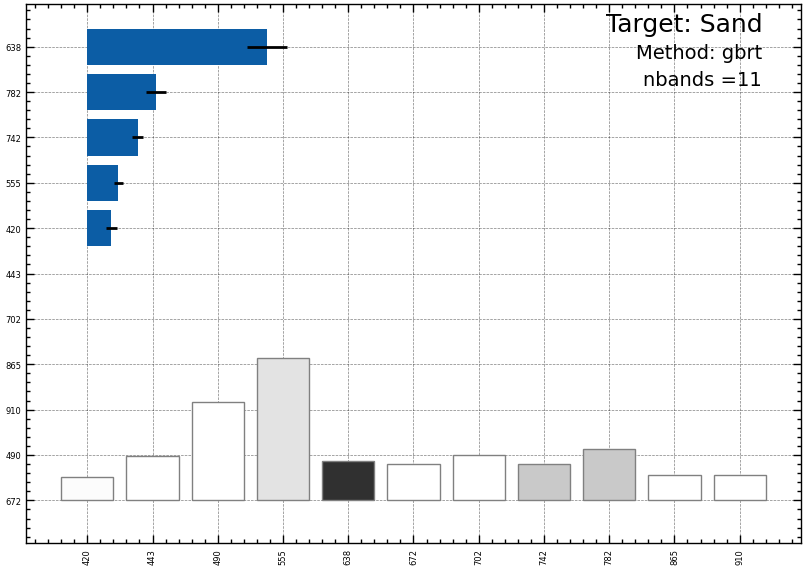

In [13]:
feature_scores['Sand'] = permutation_importance(sand_model_gbrt, fod_sampled11, T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'gbrt', 'spec': fod_sampled11, 'spec_proc': 'fod', 'n_bands': 11}
show_important_features_for ('Sand', model_details, feature_scores, 5, 50, 20)

### Kernel Ridge Regression

Sand -> [ r2 - 0.35, Spec - log, n_bands -11]

Description: To obtain the best model for sand using kernel ridge regression method we trained the model on the logarithmic transformed spectra which was resampled to the 11 bands provided by Venus.

In [17]:
sand_model_kernelridge = KernelRidge(alpha = 0.1) 
sand_model_kernelridge.fit(sampled_log11,  T[0])

KernelRidge(alpha=0.1)

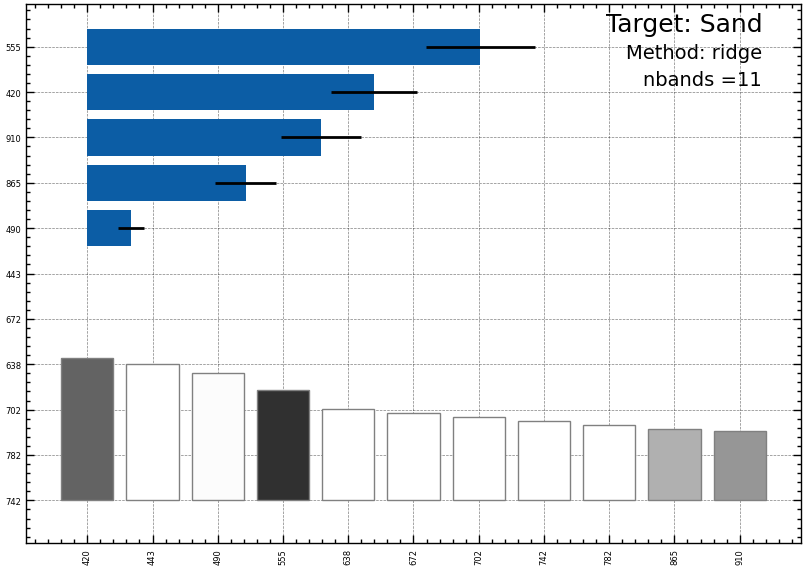

In [23]:
feature_scores['Sand'] = permutation_importance(sand_model_kernelridge, sampled_log11, T[0], n_repeats=20, random_state=0)
model_details['Sand'] = {'method': 'ridge', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}
show_important_features_for ('Sand', model_details, feature_scores, 3, 1.5, 20)

## Silt

### GBRT

Silt -> [ r2 - **0.34**, Spec - fod, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for silt using gradient boosting regression tree method we trained the model on the first order derivative of the smoothed spectra which was resampled to the 11 bands provided by Venus.


In [29]:
silt_model_gbrt = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 3, n_estimators = 30, random_state = 42) 
silt_model_gbrt.fit(fod_sampled11,  T[1])

GradientBoostingRegressor(n_estimators=30, random_state=42)

In [30]:
feature_scores['Silt'] = permutation_importance(silt_model_gbrt, fod_sampled11, T[1], n_repeats=20, random_state=0)
model_details['Silt'] = {'method': 'gbrt', 'spec': fod_sampled11, 'spec_proc': 'fod', 'n_bands': 11}

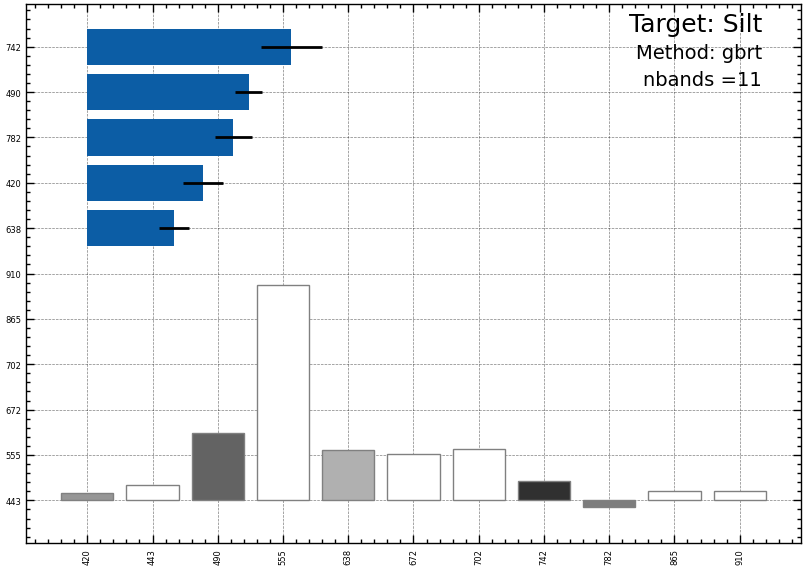

In [33]:
show_important_features_for ('Silt', model_details, feature_scores, 10, 40, 2)

###  Support Vector Regression 

Silt -> [ r2 - **0.22**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for silt using svr method we trained the model on the logarithmic transformed spectra which was resampled to the 11 bands provided by Venus.


In [35]:
silt_model_svr = SVR(C = 10, gamma = 1, kernel = 'rbf')
silt_model_svr.fit(sampled_log11,  T[1])

SVR(C=10, gamma=1)

In [36]:
feature_scores['Silt'] = permutation_importance(silt_model_svr, sampled_log11, T[1], n_repeats=10, random_state=0)
model_details['Silt'] = {'method': 'svr', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}

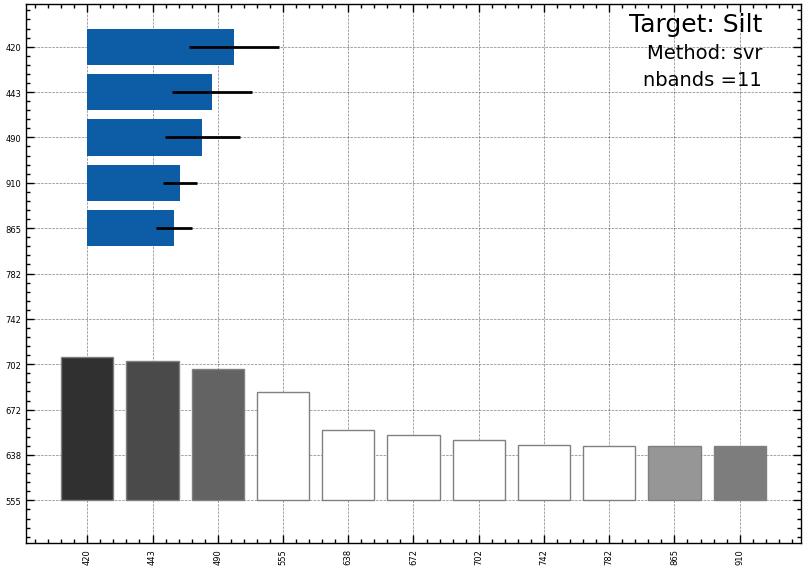

In [39]:
show_important_features_for ('Silt', model_details, feature_scores, 10,1, 2)

## Clay 

### PLSR

Clay -> [ r2 - **0.49**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for Clay using plsr method we trained the model on the logarithmic transformed spectra which was resampled to the 11 bands provided by Venus.


In [41]:
clay_model_plsr = PLSRegression(n_components=4, scale=True)
clay_model_plsr.fit(sampled_log11,  T[2])

PLSRegression(n_components=4)

In [42]:
feature_scores['Clay'] = permutation_importance(clay_model_plsr, sampled_log11, T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'plsr', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}

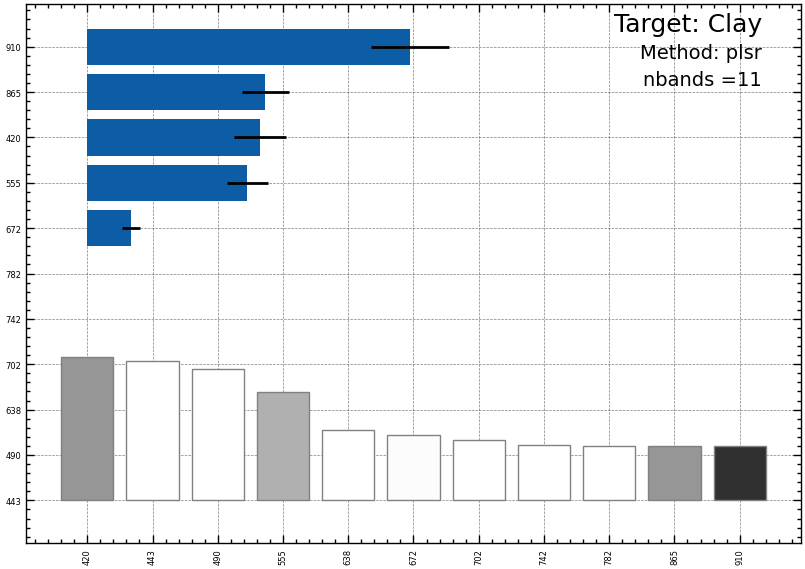

In [46]:
show_important_features_for ('Clay', model_details, feature_scores, 1.5, 1, 2)

### Cubist

Clay -> [ r2 - **0.43**, Spec - fod, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for clay using cubist method we trained the model on the first order derivative  of the smoothed spectra which was  resampled to the 11 bands provided by Venus.


In [48]:
clay_model_cubist = Cubist(n_committees = 10, n_rules = 10)
clay_model_cubist.fit(fod_sampled11,  T[2])

C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())


Cubist(n_committees=10, n_rules=10)

In [49]:
feature_scores['Clay'] = permutation_importance(clay_model_cubist, fod_sampled11, T[2], n_repeats=20, random_state=0)
model_details['Clay'] = {'method': 'cubist', 'spec': fod_sampled11, 'spec_proc': 'fod', 'n_bands': 11}

C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())
C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())
C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())
C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())
C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_strin

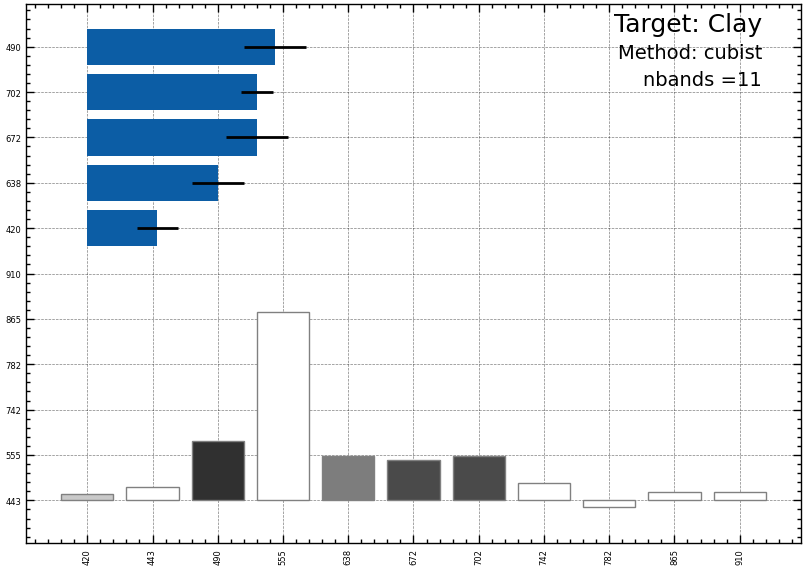

In [51]:
show_important_features_for ('Clay', model_details, feature_scores, 4, 35, 2)

## TOC

### Cubist

Clay -> [ r2 - **0.50**, Spec - fod_log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for TOC using cubist method we trained the model on the first order derivative  of logarithmic tranformed smoothed spectra which was  resampled to the 11 bands provided by Venus.


In [53]:
TOC_model_cubist = Cubist(n_committees = 20, n_rules = 10)
TOC_model_cubist.fit(fod_log11,  T[3])

C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())


Cubist(n_committees=20, n_rules=10)

In [54]:
feature_scores['TOC'] = permutation_importance(TOC_model_cubist, fod_log11, T[3], n_repeats=20, random_state=0)
model_details['TOC'] = {'method': 'cubist', 'spec': fod_log11, 'spec_proc': 'fod_log', 'n_bands': 11}

C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())
C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())
C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())
C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())
C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_strin

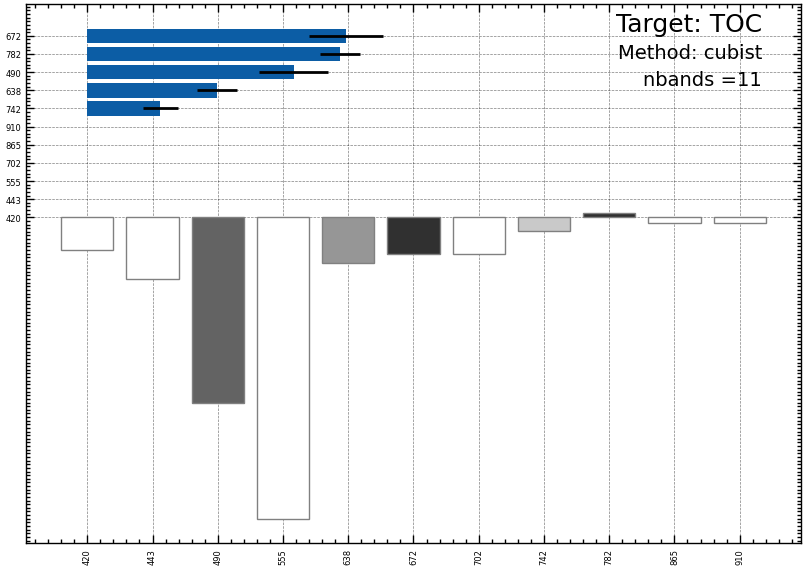

In [57]:
show_important_features_for ('TOC', model_details, feature_scores, 10, 20, 2)

###  Support Vector Regression 

TOC -> [ r2 - **0.42**, Spec - log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for TOC using svr method we trained the model on the logarithmic transformed spectra which was resampled to the 11 bands provided by Venus.


In [59]:
TOC_model_svr = SVR(C = 10, gamma = 1, kernel = 'rbf')
TOC_model_svr.fit(sampled_log11,  T[3])

SVR(C=10, gamma=1)

In [60]:
feature_scores['TOC'] = permutation_importance(TOC_model_svr, sampled_log11, T[3], n_repeats=10, random_state=0)
model_details['TOC'] = {'method': 'svr', 'spec': sampled_log11, 'spec_proc': 'log', 'n_bands': 11}

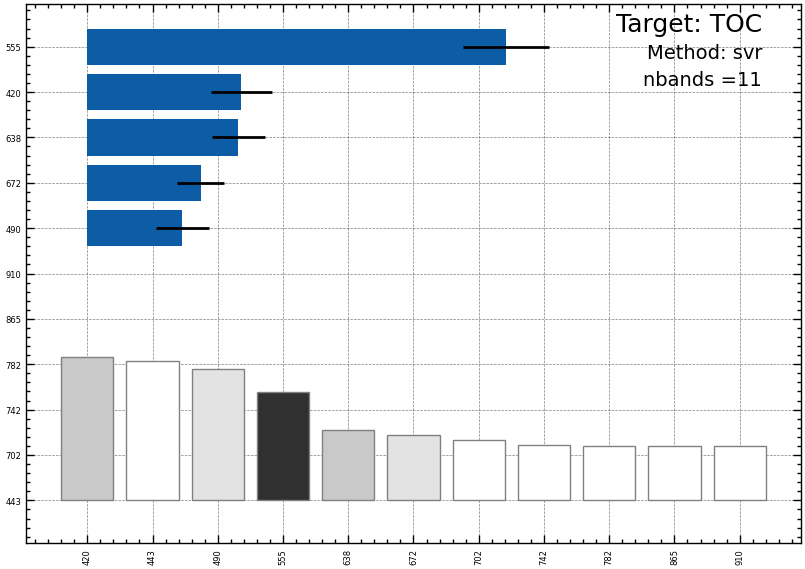

In [62]:
show_important_features_for ('TOC', model_details, feature_scores, 4,1, 2)

## CaCO3

### Cubist

CaCO3 -> [ r2 - **0.60**, Spec - fod_log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using cubist method we trained the model on the first order derivative  of logarithmic tranformed smoothed spectra which was  resampled to the 11 bands provided by Venus.


In [64]:
CaCO3_model_cubist = Cubist(n_committees = 5, n_rules = 10)
CaCO3_model_cubist.fit(fod_log11,  T[4])

C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())


Cubist(n_committees=5, n_rules=10)

In [65]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_cubist, fod_log11, T[4], n_repeats=20, random_state=0)
model_details['CaCO3'] = {'method': 'cubist', 'spec': fod_log11, 'spec_proc': 'fod_log', 'n_bands': 11}

C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())
C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())
C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())
C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_string.py:67: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  x = x.applymap(lambda a: a.lstrip())
C:\Users\abhis\AppData\Local\Programs\Python\Python311\Lib\site-packages\cubist\_make_data_strin

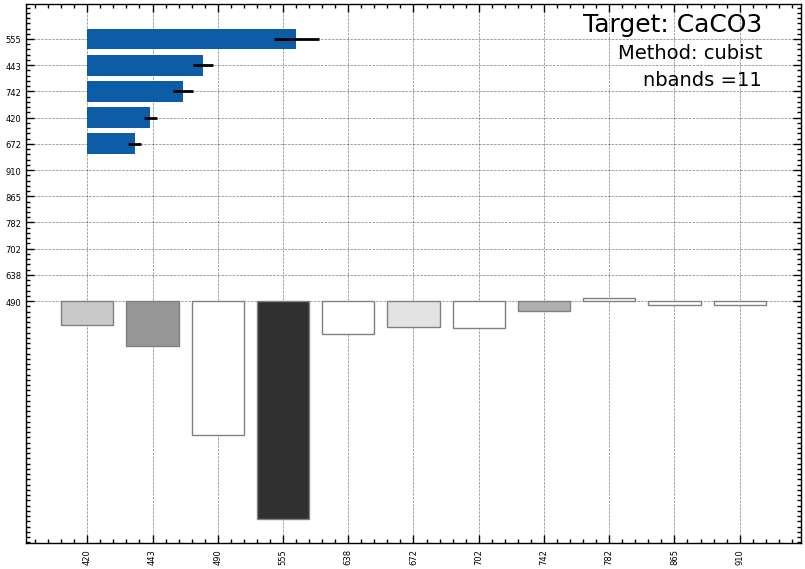

In [70]:
show_important_features_for ('CaCO3', model_details, feature_scores, 2, 10, 2)

### PLSR

CaCO3 -> [ r2 - **0.55**, Spec - fod_log, n_bands - 11]   <br/><br/>
***Description***:To obtain the best model for CaCO3 using plsr method we trained the model on the first order derivative of the logarithmic transformed smoothed spectra which was resampled to the 11 bands provided by Venus.


In [73]:
CaCO3_model_plsr = PLSRegression(n_components=10, scale=True)
CaCO3_model_plsr.fit(fod_log11,  T[4])

PLSRegression(n_components=10)

In [74]:
feature_scores['CaCO3'] = permutation_importance(CaCO3_model_plsr, fod_log11, T[4], n_repeats=20, random_state=0)
model_details['CaCO3'] = {'method': 'plsr', 'spec': fod_log11, 'spec_proc': 'fod_log', 'n_bands': 11}

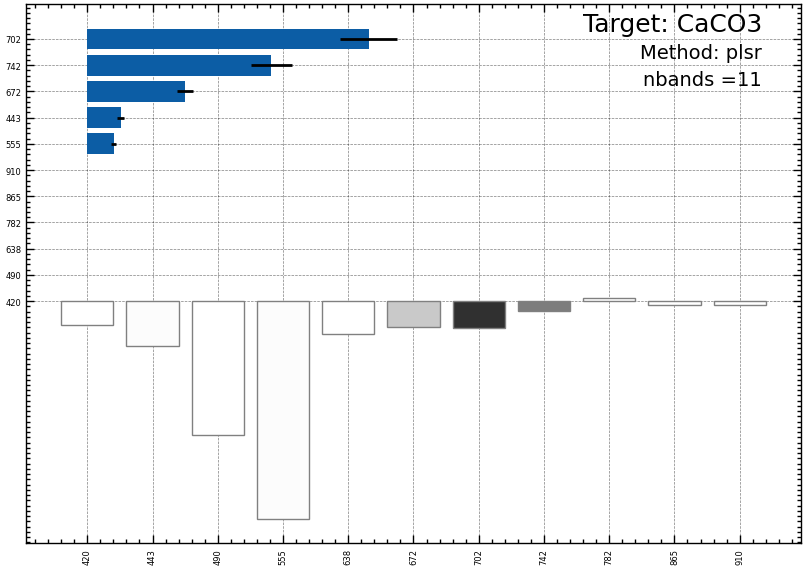

In [78]:
show_important_features_for ('CaCO3', model_details, feature_scores, 0.05, 10, 2)

In [20]:
# with open ('Feature.pickle', 'wb') as file:
#     pickle.dump(feature_scores, file)
     

In [21]:
# with open ('Models.pickle', 'wb') as file:
#     pickle.dump(model_details, file)